<a href="https://colab.research.google.com/github/helena0070406/Typeform/blob/main/exercise_3_Water_potability_Yujing_CHEN_Haiwei_FU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic regression

In [ ]:
# Import libraries, features and settings 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

Firstly, we import the data and to classify the information within the dataset before having a quick look at what the data set looks like :

In [ ]:
# Explore data

df = pd.read_csv("water_potability.csv")
# To display the top 10 rows 
df.head(10) 

df = df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity','Potability']] 	

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


view data type and other information

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


split data and create the dataframes

In [ ]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [ ]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 1524 to 2741
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1602 non-null   float64
 1   Hardness         1602 non-null   float64
 2   Solids           1602 non-null   float64
 3   Chloramines      1602 non-null   float64
 4   Sulfate          1602 non-null   float64
 5   Conductivity     1602 non-null   float64
 6   Organic_carbon   1602 non-null   float64
 7   Trihalomethanes  1602 non-null   float64
 8   Turbidity        1602 non-null   float64
 9   Potability       1602 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 137.7 KB


View newly defined data information

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 1531 to 1348
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               409 non-null    float64
 1   Hardness         409 non-null    float64
 2   Solids           409 non-null    float64
 3   Chloramines      409 non-null    float64
 4   Sulfate          409 non-null    float64
 5   Conductivity     409 non-null    float64
 6   Organic_carbon   409 non-null    float64
 7   Trihalomethanes  409 non-null    float64
 8   Turbidity        409 non-null    float64
 9   Potability       409 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 35.1 KB


Select the data information we need

In [ ]:
#Load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity','Potability']] 	

y_train = train_df["Potability"]

X_test = test_df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity','Potability']] 	

y_test = test_df["Potability"]


In [ ]:
y_test.head()

1531    1
313     1
264     1
2795    1
1071    1
Name: Potability, dtype: int64

In [ ]:
y_train.head()

1524    1
3024    0
1008    0
2438    1
1411    0
Name: Potability, dtype: int64

In [ ]:
y_train.value_counts()

0    959
1    643
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


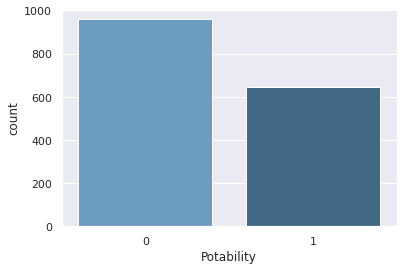

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot("Potability", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_choc = len(train_df[train_df['Potability']==0])
count_choc = len(train_df[train_df['Potability']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no Potability is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of Potability", pct_of_choc*100)


percentage of no Potability is 59.86267166042447
percentage of Potability 40.13732833957553


In [ ]:
train_df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.060423,195.814198,21637.781903,7.120268,333.335990,429.183886,14.369041,66.052267,3.957449
1,7.164414,195.492055,22286.393320,7.189727,331.799699,426.496584,14.260597,66.473711,4.005617


In [ ]:
train_df.groupby('Solids').mean()

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Solids,,,,,,,,,
320.942611,7.417824,243.304691,4.598670,336.097981,361.101769,20.421472,87.052576,3.470812,0.0
1198.943699,6.185925,236.034783,6.140033,374.095388,436.236198,11.093811,99.775078,4.090264,1.0
1351.906979,5.731042,223.704966,6.496723,380.514079,620.304639,14.672927,62.023630,3.675807,1.0
1372.091043,7.381758,203.460302,11.129154,475.737460,361.342496,16.548438,55.132546,3.338022,1.0
2552.962804,8.692115,144.236358,9.202634,347.975137,517.427471,13.963421,42.388661,2.283475,0.0
...,...,...,...,...,...,...,...,...,...
50279.262429,9.252857,168.040751,5.905056,415.450810,400.003589,11.949854,62.256881,3.300586,0.0
50793.898917,8.140344,153.748170,7.843498,306.218950,423.455906,14.322019,65.076610,4.362792,1.0
55334.702799,3.344589,156.479927,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[224,  17],
       [ 33, 135]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

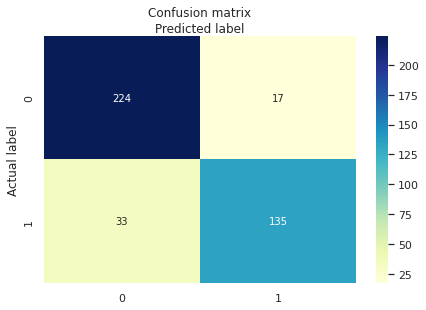

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
clf_log=LogisticRegression().fit(X_train, y_train)
y_pred=clf_log.predict(X_test)
print(y_pred)

[1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


We get the confusion matrix, which is not surprising. The number of correct and incorrect predictions are summarized with count values and broken down by each class. We believe that there is a strong distinction between the two sets of data.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8777506112469438
Precision: 0.8881578947368421
Recall: 0.8035714285714286
F1_score: 0.8035714285714286


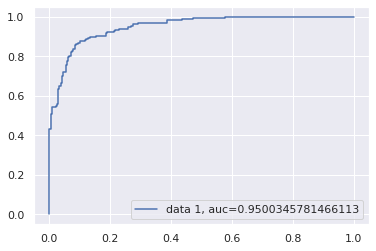

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An excellent model has AUC near to the 1 which means it has a good measure of separability. The score here is 0.92, which means that the model has a 92% chance of distinguishing between positive and negative categories.

In [ ]:
multicolinearity_check = X_train.corr()
print(multicolinearity_check)


                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.086621 -0.072988    -0.031313  0.004044   
Hardness         0.086621  1.000000 -0.043533    -0.025150 -0.114617   
Solids          -0.072988 -0.043533  1.000000    -0.036328 -0.172909   
Chloramines     -0.031313 -0.025150 -0.036328     1.000000 -0.001277   
Sulfate          0.004044 -0.114617 -0.172909    -0.001277  1.000000   
Conductivity     0.017656  0.019833 -0.003457    -0.030282 -0.021025   
Organic_carbon   0.024324  0.020973 -0.002927     0.003848  0.028787   
Trihalomethanes  0.014870 -0.020480 -0.012783     0.004479 -0.034785   
Turbidity       -0.039905 -0.019525  0.026430     0.021841 -0.022708   
Potability       0.032247 -0.004834  0.036645     0.021703 -0.018261   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017656        0.024324         0.014870  -0.039905   
Hardness             0.019833        0.020973        

Decision tree.

In [ ]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

here we input data

In [ ]:
# import database.
waterdata = pd.read_csv('water_potability.csv')
waterdata.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# drop empty values.
waterdata=waterdata.dropna()

In [ ]:
# see database.
waterdata.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


here we see their types

In [ ]:
# see types.
waterdata.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
# change type, make sure the type of the values.
waterdata['Potability'] = waterdata['Potability'].astype('int')

In [ ]:
waterdata.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
# split x and y.
X = waterdata[['ph', 'Hardness']]
y = waterdata['Potability']

In [ ]:
X.head()

,ph,Hardness
3,8.316766,214.373394
4,9.092223,181.101509
5,5.584087,188.313324
6,10.223862,248.071735
7,8.635849,203.361523


In [ ]:
# see y value.
y.head()

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Here, we classify and judge the decision tree, output with 0 and 1

In [ ]:
# to do decision tree.
from sklearn.tree import DecisionTreeClassifier

# Initiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We test the accuracy of the test

In [ ]:
# evaluate the classification tree.
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.63


We plot the scatter plot of the selected data

In [ ]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to 

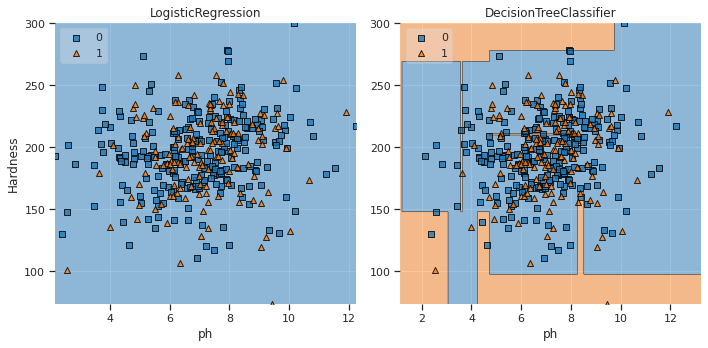

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

Through graphical description, we found the difference between the two methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

Accuracy achieved by using entropy:  0.607940446650124


Linear regression in decision tree.

In [ ]:
waterdata = pd.get_dummies(waterdata)

In [ ]:
waterdata.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
waterdata.shape

(2011, 10)

In [ ]:
# split x and y.
X = waterdata[['ph', 'Hardness']]
y = waterdata['Potability']

In [ ]:
X = waterdata.drop('ph', axis='columns')
y = waterdata['ph']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.69


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 1.67
Regression Tree test set RMSE: 1.69


Random Forests

In [ ]:
# import libraries.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
X.mean()

Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64

In [ ]:
# find the standard varience of the data.
X.std()

Hardness             32.635085
Solids             8642.239815
Chloramines           1.584820
Sulfate              41.205172
Conductivity         80.712572
Organic_carbon        3.324959
Trihalomethanes      16.077109
Turbidity             0.780346
Potability            0.490678
dtype: float64

In [ ]:
X.shape

(300, 2)

We import data and selected two groups of data to describe, 'Hardness' and 'Sulfate'

In [ ]:
df = pd.read_csv('water_potability.csv')
df.dropna(inplace=True)

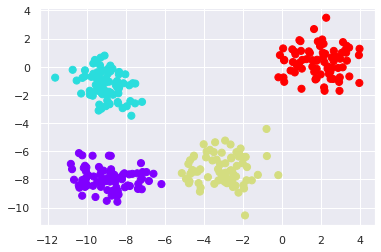

In [ ]:
from sklearn.datasets import make_blobs
X, y= [df['Hardness'].values, df['Sulfate'].values]
X, y = make_blobs(n_samples=300, centers=4,
                   cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

The decision tree is constructed according to one feature or another. For each division, the majority voting result labels of the points in the new area are assigned to the area.

In [ ]:
# fitting a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
from mlxtend.plotting import plot_decision_regions

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


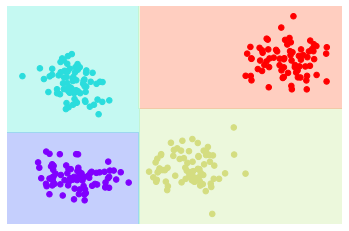

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

To do Random forest, compared with the decision tree, it no overfitting. 

We can use scikit learn's baggingclassifier meta evaluator to implement this bagging classifier:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


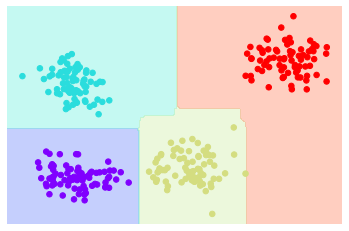

In [ ]:
# do random forest. if it is overfiting.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        )

bag.fit(X, y)
visualize_classifier(bag, X, y)

In scikit learn, the optimization of stochastic decision tree integration algorithm is realized through randomforestclassifier evaluator, which will automatically make randomized decisions. As long as we select a set of evaluators, we can complete the fitting task of each tree very quickly (parallel calculation if necessary):

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'clim'


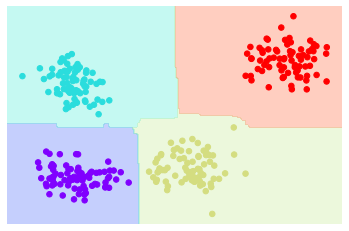

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
visualize_classifier(model, X, y);

The following data are combined by fast and slow oscillation:

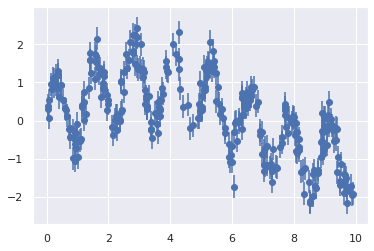

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(300)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Through the random forest regressor, the following best fitting curve can be obtained:

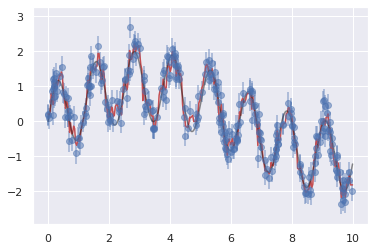

In [ ]:
# Use the random forest regressor, find the best fit curve as follows:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(300)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 300)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

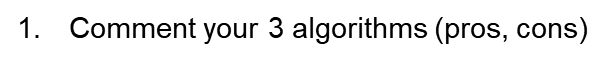

Logistic regression:
Advantages: simple implementation and wide application. When classifying, the amount of calculation is very small, the speed is very fast, and the storage resources are low; Convenient observation sample probability score; Finally, the matrix and curve obtained are more intuitive to judge the results. Its advantage is that the output value naturally falls between 0 and 1, and has probabilistic significance.
Disadvantages: when the sample is large, the performance of logistic regression is not very good. It can not fit and regress many samples at the same time, and can not deal with a large number of multi class features or variables well. For nonlinear features, transformation is required.

Decision tree: advantage:
(1) The amount of calculation is relatively small, and it is easy to convert into classification rules, so the speed is fast
(2) High accuracy: the mined classification rules are highly accurate and easy to understand
(3) It can process large sample data
Disadvantages:
(1) Easy over fitting
(2) Ignore correlation between attributes

Random forest:
advantage:
1) Random forest can process high-dimensional data (that is, data with many features) without feature selection.
2) Which characteristics can be given by random forest are more important.
3) The training speed is fast and it is easy to make parallelization method (during training, trees are independent of each other).
4) In the training process, the influence between features can be detected.
5) Random forest has strong anti overfitting ability.
6) Random forest can solve two types of problems: classification and regression, and has good estimation performance in both aspects.

Disadvantages:
1) Random forest does not perform as well in solving regression problems as it does in classification.
2) There may be many similar decision trees that mask the real results.
3) It is more suitable for big data. For small data or low dimensional data (data with fewer features), it may not produce good classification.

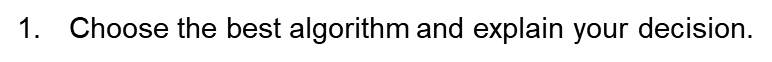

The best algorithm is decision tree, because in this case, we compared the result with that of random forest. And find it not overfitted. 
The charecter of this database:
1）we find that the database include many digital nember, and the topic and task of this work are related to environmental science.
2) not only the category, but need more accurate in number.
3) the data is independent with the others, and no relavance with other data in one colonm.
  
The advantages of decision tree, used in this work:  
1) the calculation is relatively small, the data suit this charecter.
2) it need a good accuracy result, so decision tree is very suit for this.
3）the result is not overfitting.
4) the attributes are not need to be correlated.

For evaluated other algorithms, we give some reasons that those algorithms have some disadvantages to do this work：
1) for Logistic regression: the calculation is very small. but we have a large digital number of this database. And the matrics also not suitbale for this work. we think it is not suitable for this work.
2) for random forest: we think it is fine, and this algorithm is randomly in select the value, it is very intellegent, but the disadvantages of this algorithm is obvierse, the function of regression we think is not very good, but we need the regression part. 